In [15]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins = penguins.dropna()

print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007  


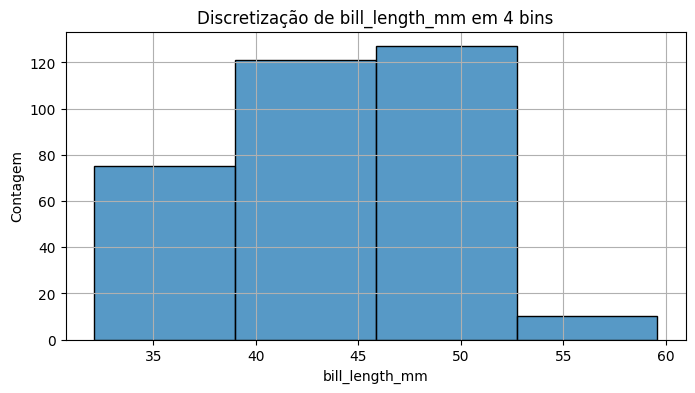

In [16]:

data = penguins[['bill_length_mm']].copy()
data = data.dropna()

n_bins = 4
data['bill_length_bin'] = pd.cut(data['bill_length_mm'], bins=n_bins)
plt.figure(figsize=(8, 4))
sns.histplot(data['bill_length_mm'], bins=n_bins, kde=False)
plt.title("Discretização de bill_length_mm em 4 bins")
plt.xlabel("bill_length_mm")
plt.ylabel("Contagem")
plt.grid(True)
plt.show()


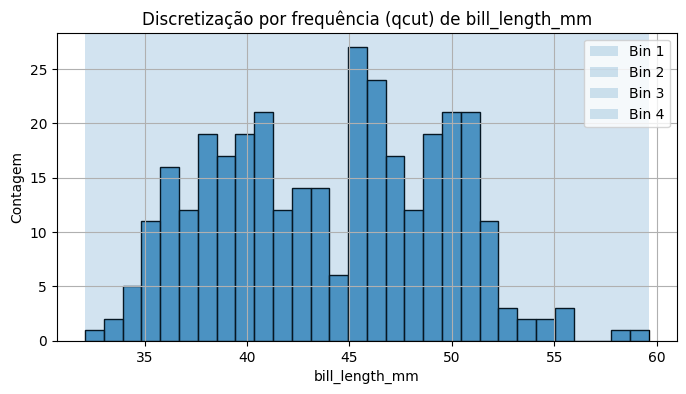

In [17]:
data['bill_length_qbin'] = pd.qcut(data['bill_length_mm'], q=n_bins)

#print(data.head(10))
#print(data['bill_length_qbin'].value_counts())

# Visualização
plt.figure(figsize=(8, 4))
sns.histplot(data['bill_length_mm'], bins=30, kde=False)
for i, bin_range in enumerate(data['bill_length_qbin'].cat.categories):
    plt.axvspan(bin_range.left, bin_range.right, alpha=0.2, label=f'Bin {i+1}')
plt.title("Discretização por frequência (qcut) de bill_length_mm")
plt.xlabel("bill_length_mm")
plt.ylabel("Contagem")
plt.legend()
plt.grid(True)
plt.show()

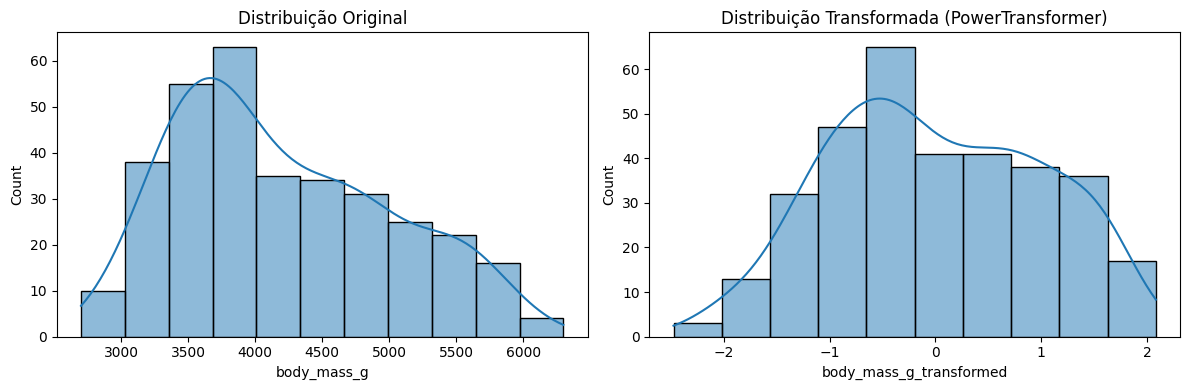

In [19]:
data = penguins[['body_mass_g']].copy()
data = data.dropna()

pt = PowerTransformer(method='yeo-johnson')

data['body_mass_g_transformed'] = pt.fit_transform(data[['body_mass_g']])
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data['body_mass_g'], kde=True, ax=axes[0])
axes[0].set_title("Distribuição Original")
sns.histplot(data['body_mass_g_transformed'], kde=True, ax=axes[1])
axes[1].set_title("Distribuição Transformada (PowerTransformer)")
plt.tight_layout()
plt.show()


In [20]:
num_cols = penguins.select_dtypes(include=['float64', 'int']).columns
data_numeric = penguins[num_cols].dropna()

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_numeric)
normalized_df = pd.DataFrame(normalized_data, columns=num_cols)

print(normalized_df.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year
0        0.254545       0.666667           0.152542     0.291667   0.0
1        0.269091       0.511905           0.237288     0.305556   0.0
2        0.298182       0.583333           0.389831     0.152778   0.0
3        0.167273       0.738095           0.355932     0.208333   0.0
4        0.261818       0.892857           0.305085     0.263889   0.0


In [21]:
num_cols = penguins.select_dtypes(include=['float64', 'int']).columns
data_numeric = penguins[num_cols].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

standardized_df = pd.DataFrame(scaled_data, columns=num_cols)
print(standardized_df.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g      year
0       -0.896042       0.780732          -1.426752    -0.568475 -1.283742
1       -0.822788       0.119584          -1.069474    -0.506286 -1.283742
2       -0.676280       0.424729          -0.426373    -1.190361 -1.283742
3       -1.335566       1.085877          -0.569284    -0.941606 -1.283742
4       -0.859415       1.747026          -0.783651    -0.692852 -1.283742


In [ ]:
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['body_mass_g']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 33.88453670719702
R²: 0.9999433245547547
